# **COMPETENCIA SPACE TITANIC**

Este notebook recopila la informacion de un viaje interestelar a traves del espacio-tiempo, donde a traves de análisis de datos vamos a extraer información importante para predecir que personas sufrieron transportación a un dimension alterna.

# CARGA Y TRANSFORMACION DE DATOS

In [186]:
# IMPORT MANIPULATION DATA LIBRARY
import pandas as pd
import numpy as np

# IMPORT DATA VISUALIZATION LIBRARY
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# IMPORT MACHINE LEARNING LIBRARY
from sklearn.model_selection import train_test_split, GridSearchCV , cross_validate
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

# OTHERS LIBRARYS
from pydotplus.graphviz import graph_from_dot_data
import warnings
warnings.simplefilter("ignore")

In [187]:
# LOAD DATASET
data = pd.read_csv("train.csv")
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [188]:
# TYPE
for i in data.columns:
    print(f'Column: {i} || Data Type : {data[i].dtype}')

Column: PassengerId || Data Type : object
Column: HomePlanet || Data Type : object
Column: CryoSleep || Data Type : object
Column: Cabin || Data Type : object
Column: Destination || Data Type : object
Column: Age || Data Type : float64
Column: VIP || Data Type : object
Column: RoomService || Data Type : float64
Column: FoodCourt || Data Type : float64
Column: ShoppingMall || Data Type : float64
Column: Spa || Data Type : float64
Column: VRDeck || Data Type : float64
Column: Name || Data Type : object
Column: Transported || Data Type : bool


In [189]:
# DUPLICATED
print(f' Dataset contain {data.duplicated().sum()} duplicated data')

 Dataset contain 0 duplicated data


In [190]:
# DATA SIZE
print(f'Dataset Size : {len(data)}')


Dataset Size : 8693


In [191]:
# NULLS
for i in data.columns:
    print(f'Column {i} contain {len(data[i]) - data[i].isnull().sum()} data \n'
            f'Null values represent {(data[i].isnull().sum()/len(data[i]))*100:.2f} % dataset \n')

Column PassengerId contain 8693 data 
Null values represent 0.00 % dataset 

Column HomePlanet contain 8492 data 
Null values represent 2.31 % dataset 

Column CryoSleep contain 8476 data 
Null values represent 2.50 % dataset 

Column Cabin contain 8494 data 
Null values represent 2.29 % dataset 

Column Destination contain 8511 data 
Null values represent 2.09 % dataset 

Column Age contain 8514 data 
Null values represent 2.06 % dataset 

Column VIP contain 8490 data 
Null values represent 2.34 % dataset 

Column RoomService contain 8512 data 
Null values represent 2.08 % dataset 

Column FoodCourt contain 8510 data 
Null values represent 2.11 % dataset 

Column ShoppingMall contain 8485 data 
Null values represent 2.39 % dataset 

Column Spa contain 8510 data 
Null values represent 2.11 % dataset 

Column VRDeck contain 8505 data 
Null values represent 2.16 % dataset 

Column Name contain 8493 data 
Null values represent 2.30 % dataset 

Column Transported contain 8693 data 
Null va

In [192]:
# DESCRIBE-STATISTICS-FLOAT COLUMNS
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [193]:
# VALUES OBJECT COLUMNS
for i in data.columns:
    if data[i].dtype == "object":
        print(f' Column: {i} values: {data[i].unique()} \n')

 Column: PassengerId values: ['0001_01' '0002_01' '0003_01' ... '9279_01' '9280_01' '9280_02'] 

 Column: HomePlanet values: ['Europa' 'Earth' 'Mars' nan] 

 Column: CryoSleep values: [False True nan] 

 Column: Cabin values: ['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S'] 

 Column: Destination values: ['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan] 

 Column: VIP values: [False True nan] 

 Column: Name values: ['Maham Ofracculy' 'Juanna Vines' 'Altark Susent' ... 'Fayey Connon'
 'Celeon Hontichre' 'Propsh Hontichre'] 



In [194]:
# DELETE NULLS
data_clean = data.dropna()
data_clean.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [195]:
# CHANGE BOOLEAN VALUES
data_clean["CryoSleep"] = data_clean["CryoSleep"].map({True:1,False:0})
data_clean["VIP"] = data_clean["VIP"].map({True:1,False:0})
data_clean["Transported"] = data_clean["Transported"].map({True:1,False:0})

In [196]:
data_clean

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,0,B/0/P,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0
1,0002_01,Earth,0,F/0/S,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1
2,0003_01,Europa,0,A/0/S,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0
3,0003_02,Europa,0,A/0/S,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0
4,0004_01,Earth,0,F/1/S,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,0,A/98/P,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0
8689,9278_01,Earth,1,G/1499/S,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0
8690,9279_01,Earth,0,G/1500/S,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1
8691,9280_01,Europa,0,E/608/S,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0


# VISULIZATION DATA   

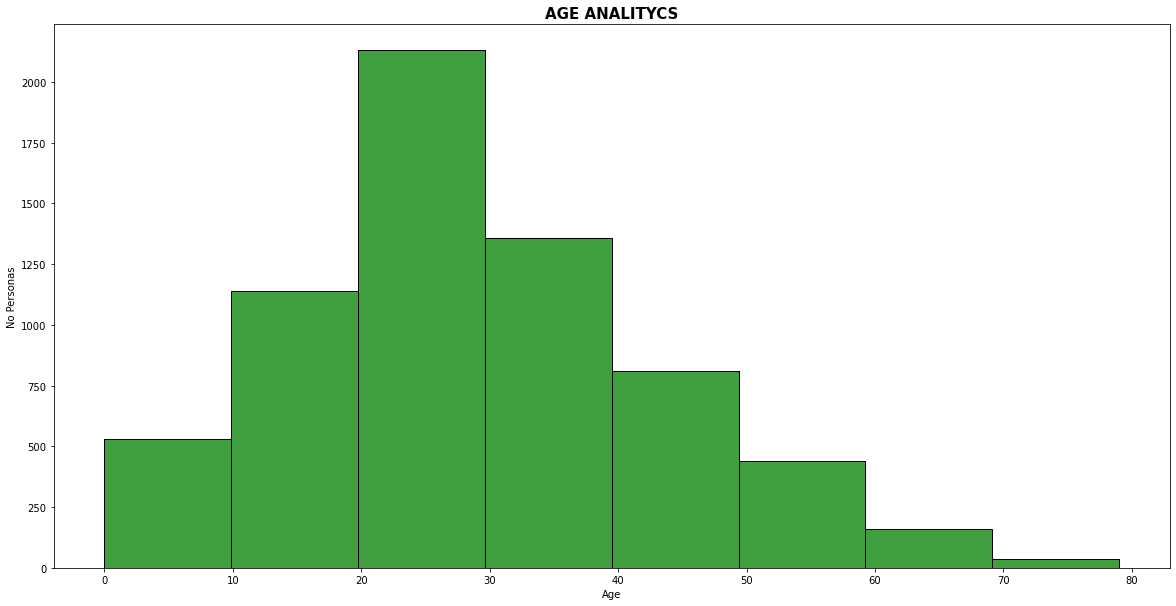

In [197]:
plt.figure(figsize=(20,10))
plt.title("AGE ANALITYCS",fontsize = 15, fontweight = "bold")
plt.ylabel("No Personas")
sns.histplot(data_clean,x="Age",bins=8,color="g")
plt.show()


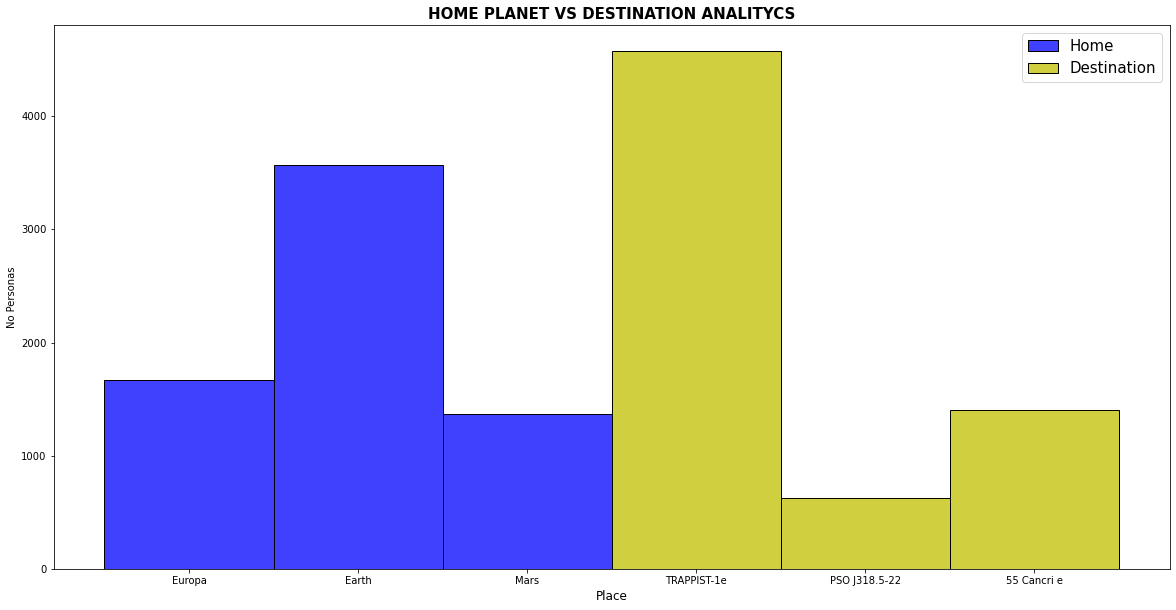

In [198]:
plt.figure(figsize=(20,10))
plt.title("HOME PLANET VS DESTINATION ANALITYCS",fontsize = 15, fontweight = "bold")
plt.ylabel("No Personas")
sns.histplot(data_clean,x="HomePlanet",bins=8,color="b")
sns.histplot(data_clean,x="Destination",color="y")
plt.xlabel("Place",fontsize=12)
plt.legend(["Home","Destination"],fontsize=15)
plt.show()

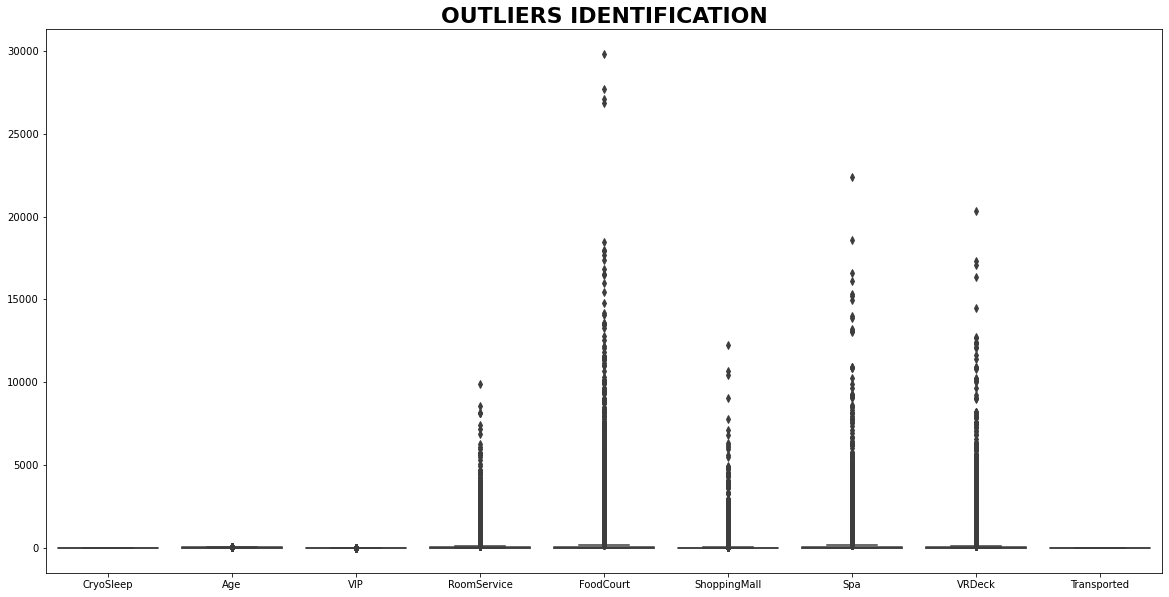

In [199]:
plt.figure(figsize=(20,10))
plt.title("OUTLIERS IDENTIFICATION", fontsize=22, fontweight="bold")
sns.boxplot(data=data_clean)
plt.show()

In [200]:
# DELETE OUTLIERS
#minimo = data_clean.quantile(0.25)
#maximo = data_clean.quantile(0.75)
#IQR = maximo - minimo

#new_data = data_clean[~((data_clean < (minimo - 1.5 * IQR)) | (data_clean > (maximo + 1.5 * IQR))).any(axis=1)]
#new_data.reset_index(inplace=True,drop=True)

In [201]:
#plt.figure(figsize=(20,10))
#plt.title("OUTLIERS IDENTIFICATION", fontsize=22, fontweight="bold")
#sns.boxplot(data=new_data)
#plt.show()

In [202]:
new_data = data_clean

In [203]:
# DELETE COLUMNS UNNECESARY FOR MACHINE LEARNING
new_data.drop(columns=["Name","Cabin","PassengerId"],inplace=True)

In [204]:
# ENCODING VARIABLES
homeplanet_dummies = pd.get_dummies(new_data["HomePlanet"],prefix="Home")
destination_dummies = pd.get_dummies(new_data["Destination"],prefix="Destination")

In [205]:
new_data = new_data.join(homeplanet_dummies)
new_data = new_data.join(destination_dummies)
new_data.drop(columns=["Destination","HomePlanet"],inplace=True)

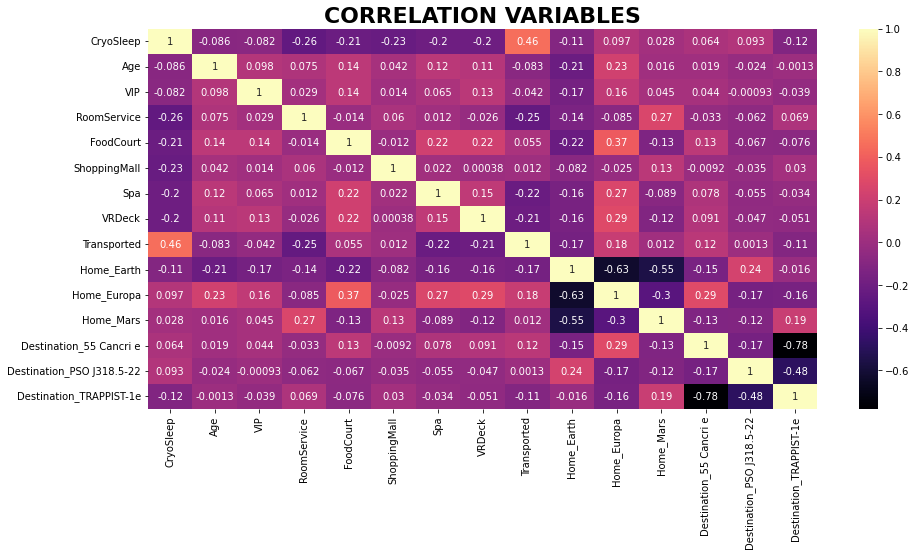

In [206]:
plt.figure(figsize=(15,7))
plt.title("CORRELATION VARIABLES", fontsize=22, fontweight="bold")
sns.heatmap(new_data.corr(),annot=True,cmap="magma")
plt.show()

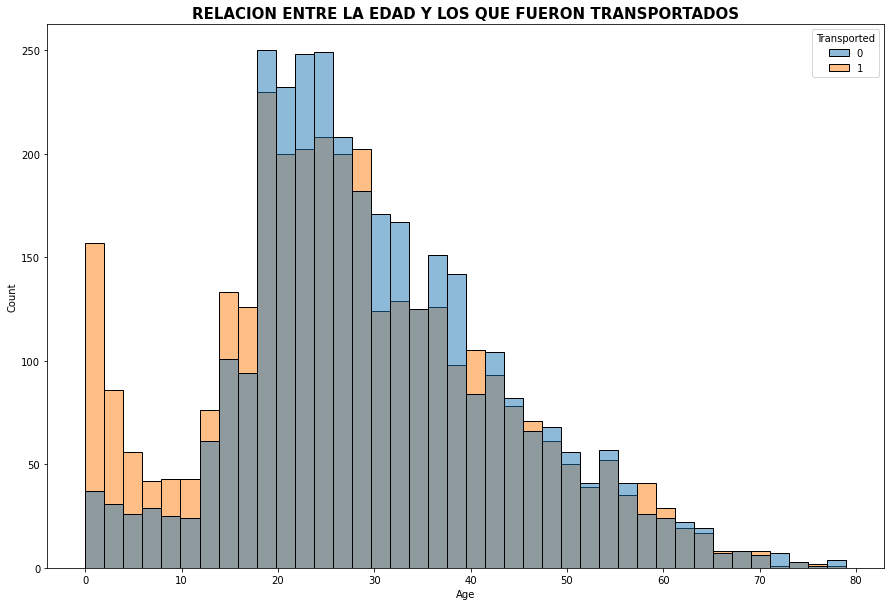

In [207]:
plt.figure(figsize=(15,10))
plt.title("RELACION ENTRE LA EDAD Y LOS QUE FUERON TRANSPORTADOS", fontsize= 15,fontweight= "bold")
sns.histplot(data=new_data,x="Age",hue="Transported")
plt.show()

In [208]:
X = new_data.drop(columns="Transported")
y = new_data["Transported"]

# MODELO BENCHMARK

## TREE DECISION

In [209]:
# NORMALIZAMOS LOS DATOS
scl = StandardScaler()
scl.fit(X)
data_model = scl.transform(X)
data_model = pd.DataFrame(data_model,columns=X.columns)
data_model.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Home_Earth,Home_Europa,Home_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,-0.738664,0.695413,-0.158555,-0.345756,-0.285355,-0.309494,-0.273759,-0.269534,-1.083063,1.717147,-0.510811,-0.52022,-0.322689,0.666047
1,-0.738664,-0.336769,-0.158555,-0.176748,-0.279993,-0.266112,0.206165,-0.230494,0.923307,-0.582361,-0.510811,-0.52022,-0.322689,0.666047
2,-0.738664,2.002842,6.306963,-0.279083,1.845163,-0.309494,5.596357,-0.226058,-1.083063,1.717147,-0.510811,-0.52022,-0.322689,0.666047
3,-0.738664,0.282540,-0.158555,-0.345756,0.479034,0.334285,2.636384,-0.098291,-1.083063,1.717147,-0.510811,-0.52022,-0.322689,0.666047
4,-0.738664,-0.887266,-0.158555,0.124056,-0.243650,-0.047470,0.220152,-0.267759,0.923307,-0.582361,-0.510811,-0.52022,-0.322689,0.666047


In [210]:
# DIVIDIMOS lOS DATOS EN TRAIN Y TEST CON ESTRATIFICACION EN TARGET
Xtrain,Xtest,ytrain,ytest = train_test_split(data_model,y,test_size=0.25,stratify=y,random_state=0)

In [211]:
# BENCHMARCK TREE
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(Xtrain,ytrain)
predict_train = tree.predict(Xtrain)

In [212]:
pd.crosstab(ytrain,predict_train)

col_0,0,1
Transported,,
0,1864,595
1,459,2036


In [213]:
accuracy_score(ytrain,predict_train)

0.7872426322163908

In [214]:
predict_test = tree.predict(Xtest)

In [215]:
pd.crosstab(ytest,predict_test)

col_0,0,1
Transported,,
0,625,195
1,158,674


In [216]:
accuracy_score(ytest,predict_test)

0.7863196125907991

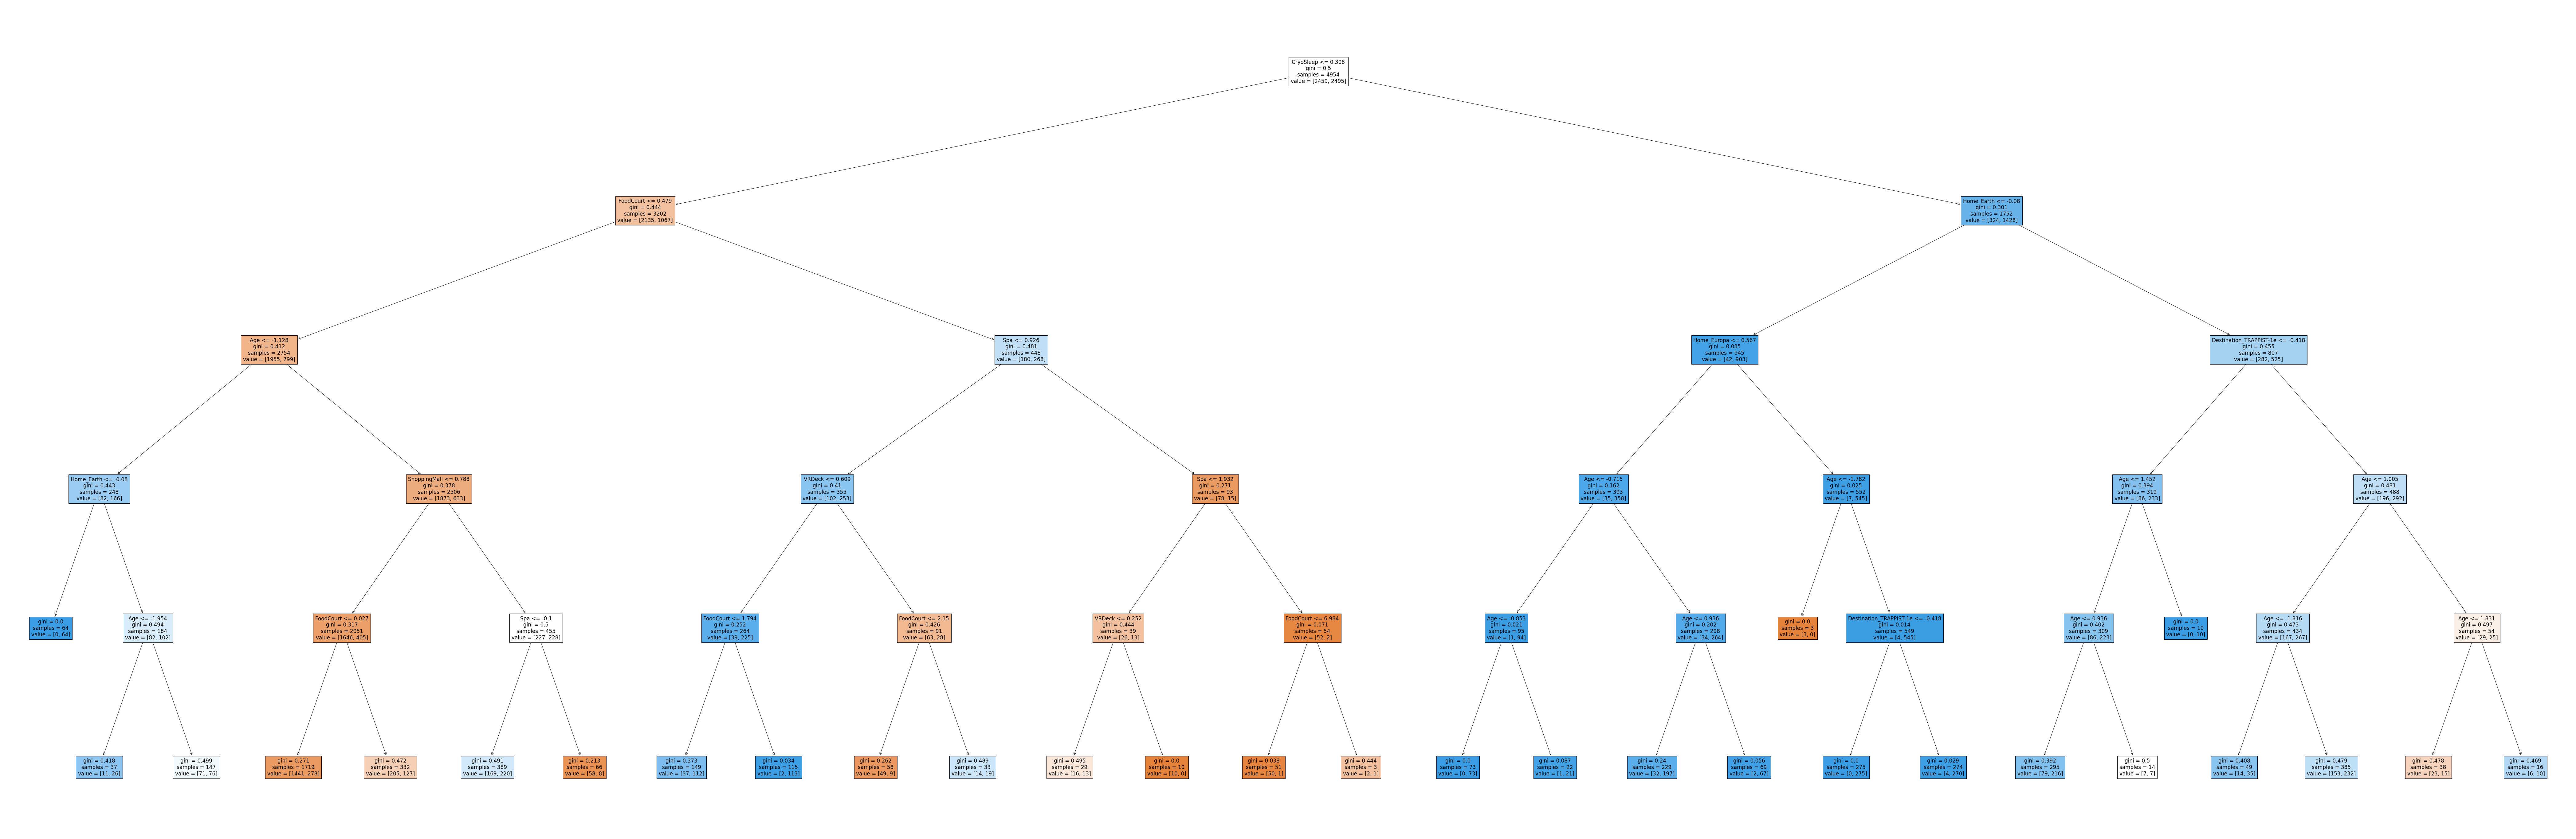

In [217]:
plt.figure(figsize=(150,50))
plot_tree(tree, feature_names=Xtrain.columns,filled=True);

In [218]:
parameters = {"criterion":["gini","entropy","log_loss"] ,
              "splitter":["best","random"],
              "max_depth": [1,5,10,15,30,50,100,1000]}

### TREE DECISION GRID SEARCH Y CROSS VALIDATION

In [219]:
tree = DecisionTreeClassifier()

In [220]:
grid = GridSearchCV(tree,param_grid=parameters,cv=5)

In [221]:
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 5, 10, 15, 30, 50, 100, 1000],
                         'splitter': ['best', 'random']})

In [222]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}

In [223]:
predict_train_grid = grid.predict(Xtrain)

In [224]:
pd.crosstab(ytrain,predict_train_grid)

col_0,0,1
Transported,,
0,1926,533
1,307,2188


In [225]:
accuracy_score(ytrain,predict_train_grid)

0.8304400484457004

# LINEAR SUPPORT VECTOR MACHINE

In [226]:
svm = LinearSVC()

In [227]:
svm_params = {"penalty":["l1","l2"],"loss":["hinge","squared_hinge"], "C":[1,5,10,15,20,30,100,1000]}

In [228]:
svm = GridSearchCV(svm,param_grid= svm_params, cv=5)

In [229]:
svm.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=LinearSVC(),
             param_grid={'C': [1, 5, 10, 15, 20, 30, 100, 1000],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']})

In [230]:
svm.best_params_

{'C': 5, 'loss': 'hinge', 'penalty': 'l2'}

In [231]:
svm_train = svm.predict(Xtrain)

In [232]:
accuracy_score(ytrain,svm_train)

0.7902704884941462

# XGB CLASSIFIER

In [233]:
model_xgb = XGBClassifier()

In [234]:
xgb_parameters = {"gamma":[-100,-20,-10,0,0.1,0.3,1,10,20,40,100,1000],
                  "max_depth":[1,10,15,20,25]}

In [235]:
grid_xgb = GridSearchCV(model_xgb,param_grid=xgb_parameters,cv=5)

In [236]:
grid_xgb.fit(Xtrain,ytrain)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [237]:
grid_xgb.best_params_

{'gamma': 10, 'max_depth': 20}

In [238]:
xgb_predict = grid_xgb.predict(Xtrain)

In [239]:
accuracy_score(ytrain,xgb_predict)

0.8134840532902705

# RANDOM FOREST

In [240]:
rf = RandomForestClassifier()

In [241]:
rf_parameters = {"n_estimators": [1,10,15,20,50],"max_depth":[1,10,15,20,50,100]}

In [242]:
grid_rf = GridSearchCV(rf,param_grid=rf_parameters,cv=5)

In [243]:
grid_rf.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 10, 15, 20, 50, 100],
                         'n_estimators': [1, 10, 15, 20, 50]})

In [244]:
grid_rf.best_params_

{'max_depth': 10, 'n_estimators': 50}

In [245]:
rf_predit = grid_rf.predict(Xtrain)

In [246]:
accuracy_score(ytrain,rf_predit)

0.8540573274121922